## 1. Import the Libraries

In [1]:
# Import Numpy, CV2, Matplotlib and Keras libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import keras

Using TensorFlow backend.


In [2]:
# Import Dataset, Model, Layers and Support Functions
from keras.datasets import fashion_mnist
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout
from keras.utils import np_utils

In [3]:
# Import Layers, Preprocessing Functions, Callbacks and Model
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

np.random.seed(35)

#### Explanation:
- **Fashion MNIST** - Dataset of clothing
- **Sequential** - Sequence of Layers as a Neural Network model in Keras
- **Conv2D** - Convolutional Layer (CONV)
- **MaxPooling2D** - Pooling Layer (POOL)
- **Dense** - Fully Connected Layer (FC)
- **Activation** - Activation Function for adding non-linearity (ReLU)
- **Flatten** - Transformation Function for layer transformation from 2D to 1D 
- **Dropout** - Dropout Layer to prevent overfitting by turn off the actual neuron
- **np_utils** - Support Functions
- **BatchNormalization** - Batch Normalization Layer to normalize and scale inputs or activations
- **ImageDataGenerator** - Generate batches of tensor image data with real-time Data Augmentation
- **ModelCheckpoint** - Callback to save the Keras model or model weights at some frequency
- **load_model** - Loads a model saved

## 2. Load the Data

In [4]:
# Import built-in Fashion-MNIST dataset from Scikit-Learn into Training and Testing datasets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### 2.1 Size (shape) of the dataset (dimensionality)

In [5]:
# Size (shape) of the Training dataset
print("X_train dimensionality: ", X_train.shape)
print("y_train dimensionality: ", y_train.shape)

X_train dimensionality:  (60000, 28, 28)
y_train dimensionality:  (60000,)


In [6]:
# Size (shape) of the Testing dataset
print("X_test dimensionality: ", X_test.shape)
print("y_test dimensionality: ", y_test.shape)

X_test dimensionality:  (10000, 28, 28)
y_test dimensionality:  (10000,)


#### Conclusion:
- Training dataset has 60,000 images and the size of the images is 28x28 pixels
- Testing dataset has 10,000 images and the size of the images is 28x28 pixels

### 2.2 Definition of classes

In [7]:
# Define the classes
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

## 3. Data Visualization

- Visualization of the Training dataset in table

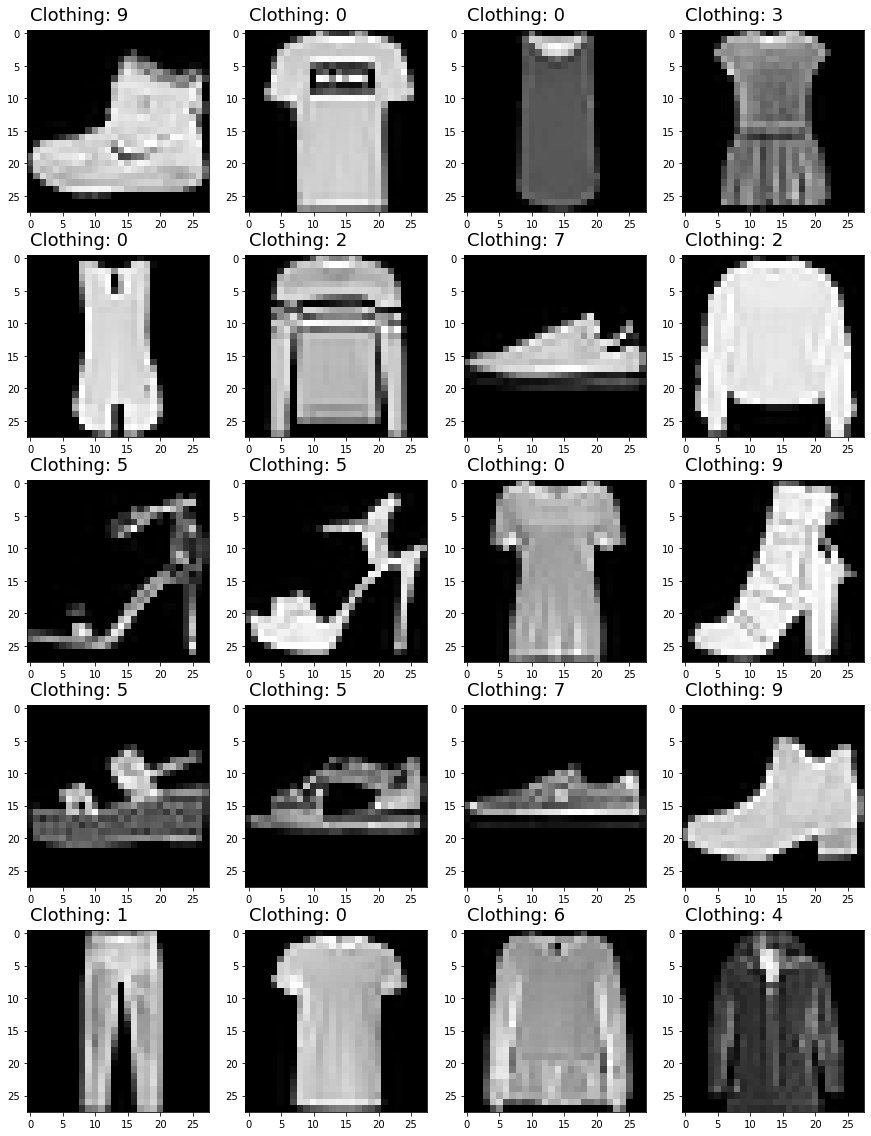

In [8]:
# Set up of the graphic area size
fig = plt.figure(figsize=(15,20))

# Define the numbers of rows and columns of the graph
rows = 5
columns = 4

# Generating cells at interval (rows x columns)
for i in range(rows*columns):
    
    # Creating a cell (adding a subgraph)
    ax1 = fig.add_subplot(rows, columns, (i+1))
    
    # Display of image in a cell (drawing a subgraph)
    ax1.imshow(X_train[i], cmap='gray')
    
    # Display of text ('Number: ' on position (0, -2) and size (20)) (adding text to a subgraph)
    title = "Clothing: "+str(y_train[i])
    ax1.text(0, -2, title, size=18)

# Display of graph
plt.show()

## 4. Data Preparation

### 4.1 Transformation of input data
- Reshaping the data into the shape the Convolutional Neural Network expects
    - Convolutional Neural Networks can accept 2D array
    - In Keras, the layers used for 2D convolutions expect pixel values with the dimensions (nb of images, width, height, channels)
    - If pixel values are grayscale, then the last pixel dimension (channel) is set to 1
- Values are converted to float in order get decimal points after division
- Normalizing (scaling) the RGB codes by dividing it to the max RGB value (255) in order to have the same distribution (in the [0, 1] interval) of all pixels in the image. Gradient Descend algorithm will converge faster

#### 4.1.1 Reshape the input data

- Reshape input dataset to have a single channel

In [9]:
# Reshaping of the input Training data to 2D array (Number of inputs, Size, Channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

# Reshaping of the input Testing data to 2D array (Number of inputs, Size, Channel)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [10]:
# Size (shape) of the input Training data
print("X_train dimensionality: ", X_train.shape)

# Size (shape) of the input Testing data
print("X_test dimensionality: ", X_test.shape)

X_train dimensionality:  (60000, 28, 28, 1)
X_test dimensionality:  (10000, 28, 28, 1)


#### Conclusion:
- Input Training data are reshaped from (60000, 28, 28) to (60000, 28, 28, 1)
- Input Testing data are reshaped from (10000, 28, 28) to (10000, 28, 28, 1)

#### 4.1.2 Convert the type of input data

- Convert from Integers to Floats

In [11]:
# Converting of the type of input Training data
X_train = X_train.astype('float32')

# Converting of the type of input Testing data
X_test = X_test.astype('float32')

In [12]:
# Type of the input Training data
print("X_train data type: ", X_train.dtype)

# Type of the input Testing data
print("X_test data type: ", X_test.dtype)

X_train data type:  float32
X_test data type:  float32


#### Conclusion:
- Type of input Training data is converted from integer to float32
- Type of input Testing data is converted from integer to float32

#### 4.1.3 Normalize the values of input data

- Normalize (scale) pixels to range 0-1

In [13]:
# Normalization of the values of the input Training data
X_train = X_train/255

# Normalization of the values of the input Testing data
X_test = X_test/255

In [14]:
# Max and min value of the input Training data
print("X_train max value: ", X_train.max())
print("X_train min value: ", X_train.min())

X_train max value:  1.0
X_train min value:  0.0


In [15]:
# Max and min value of the input Testing data
print("X_test max value: ", X_test.max())
print("X_test min value: ", X_test.min())

X_test max value:  1.0
X_test min value:  0.0


#### Conclusion:
- Values of the input Training data are normalized in range of [0.0, 1.0]
- Values of the input Testing data are normalized in range of [0.0, 1.0]

### 4.2 Transformation of output data

- Output data must be transformed into vector with length equal to Number of classes (ex. for class 4, output data is transformed into One-hot-encoding vector: [0,0,0,0,1,0,0,0,0,0])

#### 4.2.1 One-hot-encoding vector

- One-hot-encode target values

In [16]:
# Define the number of classes (number of possible output predictions)
number_classes = 10

# Convert the output Training data into One-hot-encoding vector
y_train_converted = np_utils.to_categorical(y_train, number_classes)

# Convert the output Training data into One-hot encoding vector
y_test_converted = np_utils.to_categorical(y_test, number_classes)

In [17]:
# Example of convertion of output Testing data on poistion [16] into One-hot-encoding vector
print("Old value: ", y_train[16])
print("New converted value: ", y_train_converted[16])

Old value:  1
New converted value:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Conclusion:
- Output Training data are transformed into One-hot-encoding vector (vector with length equal to Number of classes)
- Output Testing data are transformed into One-hot-encoding vector (vector with length equal to Number of classes)

### 4.3 Split of Training dataset

- Split the original Training data (60,000 images) into:
    - 80% sub-Training data (48,000 images)
    - 20% Validation data (12,000 images)
- Keep the Testing data (10,000 images) to finally evaluate the Accuracy of the model on the data it has never seen
- This helps to see whether:
    - we over-fitting on the Training data and we should lower the learning rate and train for more epochs if Validation Accuracy is higher than Training Accuracy 
    - stop over-training if Training Accuracy shift higher than the Validation Accuracy

In [18]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [19]:
# Split original training data to sub-Training (80%) and Validation data (20%)
X_train, X_val, y_train_converted, y_val = train_test_split(X_train, y_train_converted, test_size=0.2, random_state=101)

#### 4.3.1 Check the split of Training dataset

In [20]:
# Size (shape) of the sub-Training dataset
print("X_train dimensionality: ", X_train.shape)
print("y_train_converted dimensionality: ", y_train_converted.shape)

X_train dimensionality:  (48000, 28, 28, 1)
y_train_converted dimensionality:  (48000, 10)


In [21]:
# Size (shape) of the Validation dataset
print("X_val dimensionality: ", X_val.shape)
print("y_val dimensionality: ", y_val.shape)

X_val dimensionality:  (12000, 28, 28, 1)
y_val dimensionality:  (12000, 10)


#### Conclusion:
- Original Training data (60,000 images) is split into 2 datasets:
    - 80% sub-Training data (48,000 images)
    - 20% Validation data (12,000 images)

## 5. Convolutional Neural Network architecture

### 5.1 Create and Define the Convolutional Neural Network model

In [22]:
# Create Neural Network model in Keras
model = Sequential()

# Add Convolutional Layer, Activation Function for non-linearity, Batch Normalization Layer, Pooling Layer and Dropout Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

# Add Convolutional Layer, Activation Function for non-linearity, Batch Normalization Layer, Pooling Layer and Dropout Layer
model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

# Add Convolutional Layer, Activation Function for non-linearity, Batch Normalization Layer and Dropout Layer
model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))

# Add Transformation Function for layer transformation from 3D (tensor) to 1D (vector) 
model.add(Flatten())

# Add Fully Connected Layer, Activation Functions for non-linearity, Batch Normalization Layer and Dropout Layer
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))

# Add Fully Connected Layer and Activation Functions (display of probabilities)
model.add(Dense(units=10))
model.add(Activation('softmax'))

In [23]:
# Display of model information
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 64)       

#### Conclusion:
- 242,250 parameters are available to be trained
- The output of the Conv2D_1 and MaxPooling2D_1 layers are 3D tensors of shape (height, width, channels)
- The number of channels is controlled by the 1st argument passed to the Conv2D layer (32)
- The (13, 13, 32) outputs from 3rd Dropout layer are flattened into vectors of shape (1152,) before going through two Dense layers

In [24]:
# Specify the Optimizer
optimzer = keras.optimizers.Adam(lr=0.005)

In [25]:
# Complie of the model (configure of model learning process) (specification of the Loss Function, Optimizer and Metrics)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

- Explanation:
    - **categorical_crossentropy**
        - Loss Function which is relevent for multiclass, single-label classification problem
        - Cross-entropy loss calculates the error rate between the predicted value and the original value
        - Categorical is used because there are 10 classes to predict from (if 2 classes, then use binary_crossentropy)
    - **adam**
        - Optimizer which is an improvement over SGD (Stochastic Gradient Descent)
        - Responsible for updating the weights of the neurons via Backpropagation
        - Calculates the derivative of the Loss Function with respect to each weight and subtracts it from the weight (this is how Neural Network learns)

### 5.2 Image Data Augmentation

In [26]:
# Specify the Image Data Augmentation (by shifting and flipping on the Training data)
datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        )

datagen.fit(X_train)

### 5.3 Save the best model from validation

- Save the model with the best validation value (highest validation accuracy) during the training 
- The best model is saved in the file 'best_model_fashion_mnist.pt'

In [27]:
# Save the model with the best validation value (highest validation accuracy) during the training
checkpoint = ModelCheckpoint(
    filepath='best_model_fashion_mnist.pt',
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')

### 5.4 Train / fit the model

- Train the model for a fixed number of epochs (iterations on a dataset)
- Use validation data to plot out the losses and see for overfitting
- Arguments in .fit():
    - x - features that we are training on
    - y - training labels that corresponds to training features
    - batch_size - number of samples per gradient update. If unspecified, batch_size=32
    - nb_epochs - number of epochs (iterations over the entire x and y data) to train the model
    - validation_data - data to evaluate the loss at the end of each epoch (on test data)
    - verbose - verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
    - callbacks	- a set of functions to be applied at given stages of the training procedure (ex. EarlyStopping)

In [28]:
# Train / fit the Convolutional Neural Network model on Training dataset using Data Augmentation
history1 = model.fit_generator(datagen.flow(X_train, 
                                 y_train_converted,
                                 batch_size=32),
                    epochs=30,
                    callbacks=[checkpoint],
                    validation_data=(X_val, 
                                     y_val))

Epoch 1/30
1500/1500 [==============================] - 184s 123ms/step - loss: 0.7759 - accuracy: 0.7174 - val_loss: 0.4461 - val_accuracy: 0.8364

Epoch 00001: val_accuracy improved from -inf to 0.83642, saving model to best_model_fashion_mnist.pt
Epoch 2/30
1500/1500 [==============================] - 188s 125ms/step - loss: 0.5548 - accuracy: 0.7944 - val_loss: 0.4114 - val_accuracy: 0.8416

Epoch 00002: val_accuracy improved from 0.83642 to 0.84158, saving model to best_model_fashion_mnist.pt
Epoch 3/30
1500/1500 [==============================] - 182s 121ms/step - loss: 0.4987 - accuracy: 0.8160 - val_loss: 0.4058 - val_accuracy: 0.8463

Epoch 00003: val_accuracy improved from 0.84158 to 0.84633, saving model to best_model_fashion_mnist.pt
Epoch 4/30
1500/1500 [==============================] - 174s 116ms/step - loss: 0.4629 - accuracy: 0.8290 - val_loss: 0.3606 - val_accuracy: 0.8546

Epoch 00004: val_accuracy improved from 0.84633 to 0.85458, saving model to best_model_fashion_

##### Conclusion:
- After 30 epochs, Accuracy on Validation data is 91.23%
- More than 91% of the predicted labels match the true labels of the Validation data
- Change the model configuration in order to improve the baseline model:
    - **change to the learning algorithm** - adjust the Learning rate in the Optimizer, add Batch Normalization Layer, etc.
    - **increase in the depth of the model** - Add more Convolutional and Pooling Layers with the same sized filter, while increasing the number of Kernels/Filters

### 5.5 Load the best model from the validation

- Load the model with the best validation value (highest validation accuracy) during the training
- The best model was saved in the file 'best_model_fashion_mnist.pt'

In [29]:
# Best model from the validation
model = load_model('best_model_fashion_mnist.pt')

### 5.6 Evaluate the model on Training data

- Evaluate the performance of the model on Training data
- Plot to compare the historical Training Accuracy vs. Validation Accuracy and Training Loss vs. Validation Loss
    - A plot of Accuracy on the Training and Validation datasets over training Epochs
    - A plot of Loss on the Training and Validation datasets over training Epochs

In [30]:
# Read the historical data on the Training and Validation dataset from Training history
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

#### 5.6.1 Visualization of Model Accuracy

<Figure size 432x288 with 0 Axes>

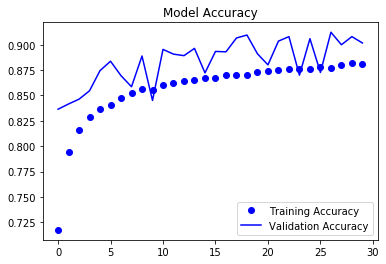

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot (summarize) history for Model Accuracy
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.figure()

#### 5.6.2 Visualization of Model Loss

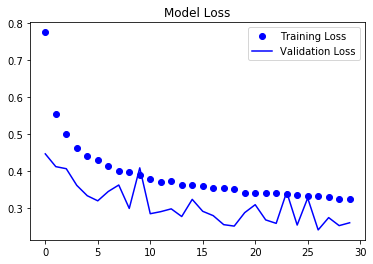

In [32]:
# Plot (summarize) history for Model Loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

##### Conclusion:
- **Plot of Model Accuracy**:
    - the model looks decent, where Training curves are closely tracking the Validation curves
    - the model is well trained and for enough epochs as the trend for Accuracy on both datasets is stabilized
    - the model has not yet over-learned the training dataset, showing comparable skill on both datasets
- **Plot of Model Loss**:
    - the model looks decent, where Training curves are closely tracking the Validation curves
    - the model is well trained and for enough epochs as the trend for Loss on both datasets is stabilized
    - the model has not yet over-learned the training dataset, showing comparable skill on both datasets

### 5.7 Predictions from the model

- Predictions from the model are performed with observations that the model has never seen before
- Observations were previously stored in the Testing dataset (X_test)

In [33]:
# Predictions from the model based on the Testing dataset
predictions = model.predict_classes(X_test)
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

### 5.8 Evaluate the model on Testing data

- Provides the score for the Testing data
- Model predicts the class of the data and predicted class is matched with output Testing label to give the Accuracy
- Accuracy is the fraction of labels that the CNN predicts correctly

In [34]:
# Evaluate the performance of the model on Testing dataset
score = model.evaluate(X_test, y_test_converted)

10000/10000 [==============================] - 11s 1ms/step


#### 5.8.1 Calculate the Accuracy, Cross-entropy Loss and CNN Error

In [35]:
# Calculate the Accuracy of model prediction on Testing dataset
print('Test Accuracy: ', score[1])

Test Accuracy:  0.9038000106811523


In [36]:
# Calculate the Cross-entropy Loss of model prediction on Testing dataset
print('Test Loss:', score[0])

Test Loss: 0.2571229157805443


In [37]:
# Calculate the CNN Error of model prediction on Testing dataset
print("CNN Error: %.2f%%" % (100-score[1]*100))

CNN Error: 9.62%


##### Conclusion:
- Accuracy on Testing data is 90.38%, which is decent
- More than 90% of the predicted labels match the true labels of the Testing dataset
- Cross-entropy Loss on Testing data is 0.26
- Error of the Convolutional Neural Network is 9.62%

#### 5.8.2 Classification report 

- Summarize (evaluate) the performance of the classifier on Testing data
- Basic terminology used in Classification report:								
    - **precision** -> how many times the positive prediction was actually positive (TP / (TP+FP))
	- **recall** -> out of all positive points how many were predicted positive (TP / (TP+FN))
	- **f1-score** -> Harmonic mean of precision and recall ((precision * recall) / (precision + recall))
	- **support** -> quantity per class

In [38]:
# Import the Classification report from Scikit-Learn metrics
from sklearn.metrics import classification_report

In [39]:
# Evaluate the performance of the model on Testing dataset by using Classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.87      0.87      1000
           3       0.91      0.91      0.91      1000
           4       0.85      0.84      0.85      1000
           5       0.96      0.98      0.97      1000
           6       0.71      0.72      0.71      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



##### Conclusion:
- It's apparent that the classifier is underperforming for class 6 in terms of all metrics
- For class 0, class 2 and class 4 the classifier is slightly lacking for all metrics as well

#### 5.8.3 Example of prediction on Testing dataset

There are 10 different categories (Label - Description) to classify in the Fashion_MNIST dataset:
- 0 - T-shirt/top
- 1 - Trouser
- 2 - Pullover
- 3 - Dress
- 4 - Coat
- 5 - Sandal
- 6 - Shirt
- 7 - Sneaker
- 8 - Bag
- 9 - Ankle boot

In [40]:
# Get the predictions from the model based on the Testing dataset
def get_prediction(image):
    
    image = np.expand_dims(image,axis=0)
    
    # Display of image in a cell (drawing a subgraph) and reshape of the input Testing data into 2D array
    plt.imshow(image.reshape(28,28))

    # Prdictions from the model on the Testing dataset
    prediction = model.predict(image)

    # Display the predicted output (class)
    plt.title("Predicted class: "+str(np.argmax(prediction)))
    predicted_class = np.argmax(prediction)
    return classes[predicted_class]

Predicted class:  Coat


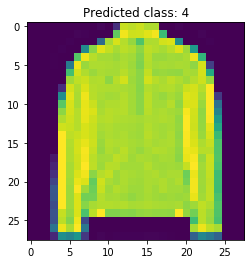

In [41]:
# Example of prediction of the output on input Testing data on poistion [1608]
predicted_class = get_prediction(X_test[1608])
print("Predicted class: ", predicted_class)